# Pampa Energia

Pampa Energia S.A. is the largest independent energy company in Argentina. Even though the company is only 20 years old, it has over 2 billion USD in revenue and over 10,000 employees. 

While the company is based in Buenos Aires Argentina, it is publically traded on both the New York Stock Exchange (NYSE) and the Buenos Aires Stock Exchange, Bolsa de Comercio de Buenos Aires (BCBA). The tickers for both are PAM and PAMP respectively. Over the last 5 years, both of these stocks have seen massive increases in share price. The BCBA: PAMP has  increased over 8,500% and NYSE: PAM by over 500%.

There are definitely several factors to consider beyond just profitability when looking at the performance of this company's share price, because the quarterly revenue had stabilised at around 200 million USD before seeing a sharp increase to almost 1 billion from Q3 2016 to Q3 2020, before falling back down to a stable level of about 450 million USD over the last 4.

In this document, I will start by finding the Ogive of the daily returns to identify a  significant and consistent return, then following it up with a forecast by modelling the countries interest rates as a Ornstein-Uhlenbeck Process.

## Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

## Stock Price Analysis

### Ogives (cumulative relative frequency graph to analyse distribution)

[*********************100%***********************]  1 of 1 completed


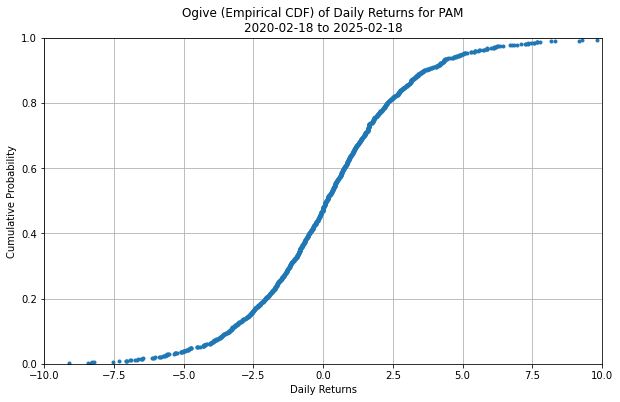

In [2]:

ticker = "PAM"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime("%Y-%m-%d")

df = yf.download(ticker, start=start_date, end=end_date)


df['returns'] = df['Adj Close'].pct_change() *100
returns = df['returns'].dropna()

returns

num_bins=20


# -- Method A: Using a direct empirical CDF approach --
returns_sorted = np.sort(df['returns'])
n = len(returns_sorted)
cdf = np.arange(1, n + 1) / n  # Fraction of data points <= each value

plt.figure(figsize=(10, 6))
plt.plot(returns_sorted, cdf, marker='.', linestyle='none')
plt.title(f'Ogive (Empirical CDF) of Daily Returns for {ticker}\n{start_date} to {end_date}')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# Set fixed axis limits
plt.xlim(-10, 10)  # Adjust based on expected range of daily returns
plt.ylim(0, 1)     # Cumulative probability always ranges from 0 to 1

# Show the plot
plt.show()

plt.show()



In [3]:
# 5. Compute and display summary statistics
count = len(returns)
mean_value = returns.mean()
median_value = returns.median()

# For the mode, keep in mind there can be multiple modes; we'll display the first one
mode_values = returns.mode()
if len(mode_values) > 0:
    mode_value = mode_values[0]
else:
    mode_value = None

quartiles = returns.quantile([0.25, 0.5, 0.75])

print("Summary Statistics for Daily Returns:")
print(f"  Number of Data Points: {count}")
print(f"  Mean:  {mean_value:.6f}")
print(f"  Median: {median_value:.6f}")
print(f"  Mode:   {mode_value:.6f}" if mode_value is not None else "  Mode:   None")
print("  Quartiles (25%, 50%, 75%):")
print(quartiles)

# Alternatively, you can use describe() for a quick summary:
print("\nFull .describe() output:")
print(returns.describe())

Summary Statistics for Daily Returns:
  Number of Data Points: 1256
  Mean:  0.193652
  Median: 0.121903
  Mode:   0.000000
  Quartiles (25%, 50%, 75%):
0.25   -1.602098
0.50    0.121903
0.75    1.810786
Name: returns, dtype: float64

Full .describe() output:
count    1256.000000
mean        0.193652
std         3.075395
min       -17.572603
25%        -1.602098
50%         0.121903
75%         1.810786
max        22.172948
Name: returns, dtype: float64


### Comparison to the S&P500

[*********************100%***********************]  1 of 1 completed


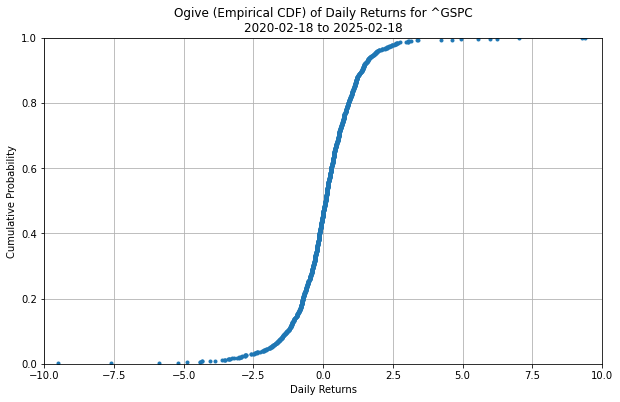

In [4]:


ticker = "^GSPC"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime("%Y-%m-%d")

df = yf.download(ticker, start=start_date, end=end_date)


df['returns'] = df['Adj Close'].pct_change() *100
returns = df['returns'].dropna()

returns

num_bins=20


# -- Method A: Using a direct empirical CDF approach --
returns_sorted = np.sort(df['returns'])
n = len(returns_sorted)
cdf = np.arange(1, n + 1) / n  # Fraction of data points <= each value

plt.figure(figsize=(10, 6))
plt.plot(returns_sorted, cdf, marker='.', linestyle='none')
plt.title(f'Ogive (Empirical CDF) of Daily Returns for {ticker}\n{start_date} to {end_date}')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# Set fixed axis limits
plt.xlim(-10, 10)  # Adjust based on expected range of daily returns
plt.ylim(0, 1)     # Cumulative probability always ranges from 0 to 1

# Show the plot
plt.show()

plt.show()



In [5]:
# 5. Compute and display summary statistics
count = len(returns)
mean_value = returns.mean()
median_value = returns.median()

# For the mode, keep in mind there can be multiple modes; we'll display the first one
mode_values = returns.mode()
if len(mode_values) > 0:
    mode_value = mode_values[0]
else:
    mode_value = None

quartiles = returns.quantile([0.25, 0.5, 0.75])

print("Summary Statistics for Daily Returns:")
print(f"  Number of Data Points: {count}")
print(f"  Mean:  {mean_value:.6f}")
print(f"  Median: {median_value:.6f}")
print(f"  Mode:   {mode_value:.6f}" if mode_value is not None else "  Mode:   None")
print("  Quartiles (25%, 50%, 75%):")
print(quartiles)

# Alternatively, you can use describe() for a quick summary:
print("\nFull .describe() output:")
print(returns.describe())

Summary Statistics for Daily Returns:
  Number of Data Points: 1256
  Mean:  0.056535
  Median: 0.088450
  Mode:   -11.984055
  Quartiles (25%, 50%, 75%):
0.25   -0.530819
0.50    0.088450
0.75    0.728787
Name: returns, dtype: float64

Full .describe() output:
count    1256.000000
mean        0.056535
std         1.345720
min       -11.984055
25%        -0.530819
50%         0.088450
75%         0.728787
max         9.382774
Name: returns, dtype: float64


## Investment Thesis 1: Market Reforms and Tariff Optimisation

### Ornstein-Uhlenbeck Process

Stochastic process that describes the evolution of a system subject to both random fluctuations (noise) and a mean-reverting force.


The Ornstein-Uhlenbeck process is defined by the following stochastic differential equation:

$$
dX_t = \theta (\mu - X_t) dt + \sigma dW_t
$$

where:
- $X_t$ is the stochastic process being modelled
-  $\theta$ is the **mean reversion rate**.
- $\mu$ is the **long-term mean**.
- $ \sigma$ is the **volatility**.
- $ W_t $ is a **Wiener process (Brownian motion)**.

### OU Intuition

if the $X_t$ is above the $\mu$, then the term $  \theta (\mu - X_t) dt $ is negative, which leads to a negative $dX_t$, meaning the process falls back down towards the mean. If the $X_t$ is bwlow the $\mu$, then the opposite is true. This term is known as the **deterministic drift term**

The **stochastic diffusion term** is $\sigma dW_t$. It is the random noise modelled by the Wiener process. This ensures that even if the $X_t$ reverts to $\mu$, it fluctuates and converges.

The explicit solution to the OU process is:

$$
X_t = X_0 e^{-\theta t} + \mu (1 - e^{-\theta t}) + \sigma \int_0^t e^{-\theta (t-s)} dW_s
$$

### Prepare the dataset

In [6]:
# Load interest rates data
interest_rates = pd.read_csv("interest_rates.csv", index_col="Date")


# Generate alternating dates from Jan 2000 to Jan 2025
dates = pd.date_range(start="2000-01-01", end="2025-01-01", freq="6MS")  # '6MS' = Start of month, every 6 months

dates = df = pd.DataFrame({"Date": dates})
interest_rates.index = dates['Date']

interest_rates.head()

,Interest Rate
Date,
2000-01-01,7.07
2000-07-01,7.01
2001-01-01,13.34
2001-07-01,9.27
2002-01-01,80.84


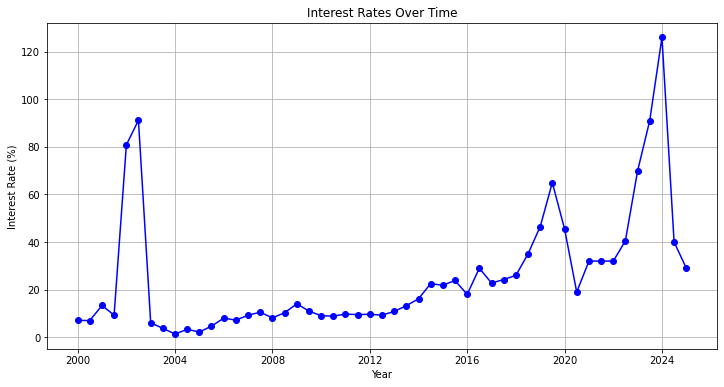

In [7]:

# Plot interest rates over time
plt.figure(figsize=(12, 6))
plt.plot(interest_rates.index, interest_rates["Interest Rate"], marker="o", linestyle="-", color="b")
plt.title("Interest Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.grid(True)
plt.show()


### Ensure the data is mean-reverting

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(interest_rates["Interest Rate"])
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")

if adf_result[1] < 0.05:
    print("The data is stationary (mean-reverting).")
else:
    print("The data is non-stationary (shows a trend).")


ADF Statistic: -3.2674865015212555
P-Value: 0.016395876271354883
The data is stationary (mean-reverting).


In [9]:

# Extract interest rate values
y = interest_rates["Interest Rate"].values
t = np.arange(len(y))  # Convert time index to numerical values

# ---- Step 1: Estimate Parameters for the OU Process ----
# Define the mean-reverting function: dy/dt = θ(μ - y) + σ * dW
def ou_function(t, theta, mu):
    return mu + (y[0] - mu) * np.exp(-theta * t)

# Fit the OU model to the data
params, _ = curve_fit(ou_function, t, y)
theta_est, mu_est = params

# Estimate volatility (σ)
diff_y = np.diff(y)
sigma_est = np.std(diff_y) * np.sqrt(2 * theta_est)

# Print estimated parameters
print(f"Estimated Mean-Reversion Speed (θ): {theta_est:.4f}")
print(f"Estimated Long-Term Mean (μ): {mu_est:.2f}%")
print(f"Estimated Volatility (σ): {sigma_est:.2f}")


Estimated Mean-Reversion Speed (θ): 0.8089
Estimated Long-Term Mean (μ): 26.19%
Estimated Volatility (σ): 28.32


/var/folders/cz/5jgxph3s48z_wzh0jf66hsgh0000gn/T/ipykernel_39910/1181521671.py:8: RuntimeWarning: overflow encountered in exp
  return mu + (y[0] - mu) * np.exp(-theta * t)


### Ornstein-Uhlenbeck Forecast

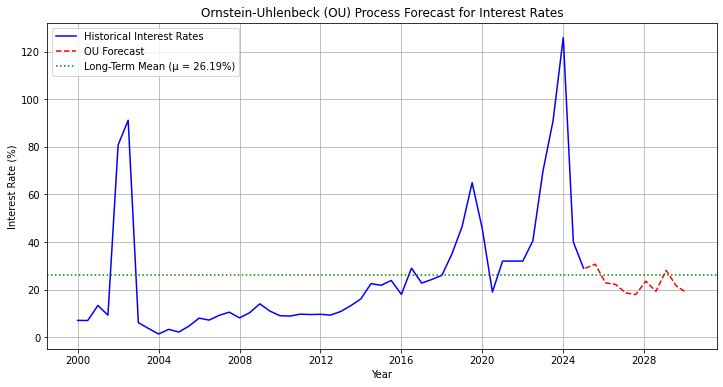

In [10]:
# ---- Step 2: Simulate Future Interest Rates Using the OU Process ----
num_forecast_steps = 10  # Forecast for the next 10 periods
dt = 1  # Time step
ou_forecast = [y[-1]]  # Start from last observed interest rate

lower_bound, upper_bound = 15, 40  # Bounds for interest rates
smoothing_factor = 0.5  # Reduce randomness effect

for _ in range(num_forecast_steps):
    dX = theta_est * (mu_est - ou_forecast[-1]) * dt + (sigma_est * np.random.normal() * smoothing_factor)
    new_rate = ou_forecast[-1] + dX
    
    # Apply bounds
    new_rate = max(lower_bound, min(upper_bound, new_rate))
    
    # Apply a simple smoothing effect to reduce abrupt changes
    new_rate = (ou_forecast[-1] + new_rate) / 2  
    
    ou_forecast.append(new_rate)
    

# ---- Step 3: Plot the Historical Data & OU Forecast ----
plt.figure(figsize=(12, 6))

# Plot historical interest rates
plt.plot(interest_rates.index, y, label="Historical Interest Rates", color="blue")

# Create time index for forecast
future_dates = pd.date_range(interest_rates.index[-1], periods=num_forecast_steps + 1, freq="6ME")

# Plot forecast
plt.plot(future_dates, ou_forecast, label="OU Forecast", linestyle="dashed", color="red")

# Add long-term mean reference line
plt.axhline(mu_est, color="green", linestyle="dotted", label=f"Long-Term Mean (μ = {mu_est:.2f}%)")

plt.title("Ornstein-Uhlenbeck (OU) Process Forecast for Interest Rates")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.legend()
plt.grid(True)
plt.show()
